In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import scipy.constants as const
from scipy.optimize import curve_fit
import seaborn as sns
import pwlf
import helperFunc
import cv2
from PIL import Image
from scipy.fft import fft, fftfreq
import scipy.signal
from sklearn.model_selection import train_test_split
from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math


sns.set_context("talk")


In [2]:
def extractMaxIntensityFromCAMData(day, timeStamp, dataSetIndex):
    file = np.loadtxt(
        "./2021/10/{}/202110{}/Raw/202110{}__{}.CAM".format(
            day, str(day) + str(timeStamp), str(day) + str(timeStamp), dataSetIndex
        ),
        skiprows=1,
    )
    data = np.array(file)
    return np.max(data)
    

In [3]:
def extractIntensitiesFromDataSet(DAY, TIMESTAMP, FRAMES):
    res = []
    for f in np.arange(1,FRAMES + 1,1):
        res.append(extractMaxIntensityFromCAMData(DAY, TIMESTAMP, f))
    return np.array(res)


In [4]:
frequencies = np.array([])
maxIntensities = np.array([])

frequencies_ = np.array([])
maxIntensities_ = np.array([])

frequencies__ = np.array([])
maxIntensities__ = np.array([])

In [5]:
#finer
TIMESTAMP = 144007
maxIntensities_ = np.concatenate((maxIntensities_, extractIntensitiesFromDataSet(25, TIMESTAMP , 91)))
frequencies_ = np.concatenate((frequencies_, np.arange(10e3, 190e3 + 1e3, 2e3)))

In [6]:
#finer
TIMESTAMP = 143146
maxIntensities_ = np.concatenate((maxIntensities_, extractIntensitiesFromDataSet(25, TIMESTAMP , 20)))
frequencies_ = np.concatenate((frequencies_, np.arange(210e3, 400e3 + 5e3, 10e3)))

In [7]:
#finer finer
TIMESTAMP = 143343
maxIntensities__ = np.concatenate((maxIntensities__, extractIntensitiesFromDataSet(25, TIMESTAMP , 21)))
frequencies__ = np.concatenate((frequencies__, np.arange(300e3, 340e3 + 1e3, 2e3)))

In [8]:
#finer finer
TIMESTAMP = 143503
maxIntensities__ = np.concatenate((maxIntensities__, extractIntensitiesFromDataSet(25, TIMESTAMP , 21)))
frequencies__ = np.concatenate((frequencies__, np.arange(340e3, 380e3 + 1e3, 2e3)))

In [9]:
TIMESTAMP = 143033
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 20)))
frequencies = np.concatenate((frequencies, np.arange(10e3, 200e3 + 5e3, 10e3)))

In [10]:
TIMESTAMP = 143146
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 20)))
frequencies = np.concatenate((frequencies, np.arange(210e3, 400e3 + 5e3, 10e3)))

In [11]:
TIMESTAMP = 143646
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 61)))
frequencies = np.concatenate((frequencies, np.arange(0.4e6, 1e6 + 0.5e4, 1e4)))

In [12]:
TIMESTAMP = 144735
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 100)))
frequencies = np.concatenate((frequencies, np.arange(1e6, 2e6, 1e4)))


In [13]:
TIMESTAMP = 145259
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 100)))
frequencies = np.concatenate((frequencies, np.arange(2e6, 3e6, 1e4)))


In [14]:
TIMESTAMP = 150534
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 100)))
frequencies = np.concatenate((frequencies, np.arange(3e6, 4e6, 1e4)))


In [15]:
TIMESTAMP = 151033
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 100)))
frequencies = np.concatenate((frequencies, np.arange(4e6, 5e6, 1e4)))


In [16]:
TIMESTAMP = 151632
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 100)))
frequencies = np.concatenate((frequencies, np.arange(5e6, 6e6, 1e4)))


In [17]:
TIMESTAMP = 152159
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(6e6, 7e6, 2e4)))


In [18]:
TIMESTAMP = 152431
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(7e6, 8e6, 2e4)))

In [19]:
TIMESTAMP = 152701
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(8e6, 9e6, 2e4)))

In [20]:
TIMESTAMP = 154001
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(9e6, 10e6, 2e4)))

In [21]:
TIMESTAMP = 154237
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(10e6, 11e6, 2e4)))

In [22]:
TIMESTAMP = 154516
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(11e6, 12e6, 2e4)))

In [23]:
TIMESTAMP = 154950
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(12e6, 13e6, 2e4)))

In [24]:
TIMESTAMP = 155235
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(13e6, 14e6, 2e4)))

In [25]:
TIMESTAMP = 155801
maxIntensities = np.concatenate((maxIntensities, extractIntensitiesFromDataSet(25, TIMESTAMP , 50)))
frequencies = np.concatenate((frequencies, np.arange(14e6, 15e6, 2e4)))

Text(0.5, 1.0, 'RWA = 0.1 V')

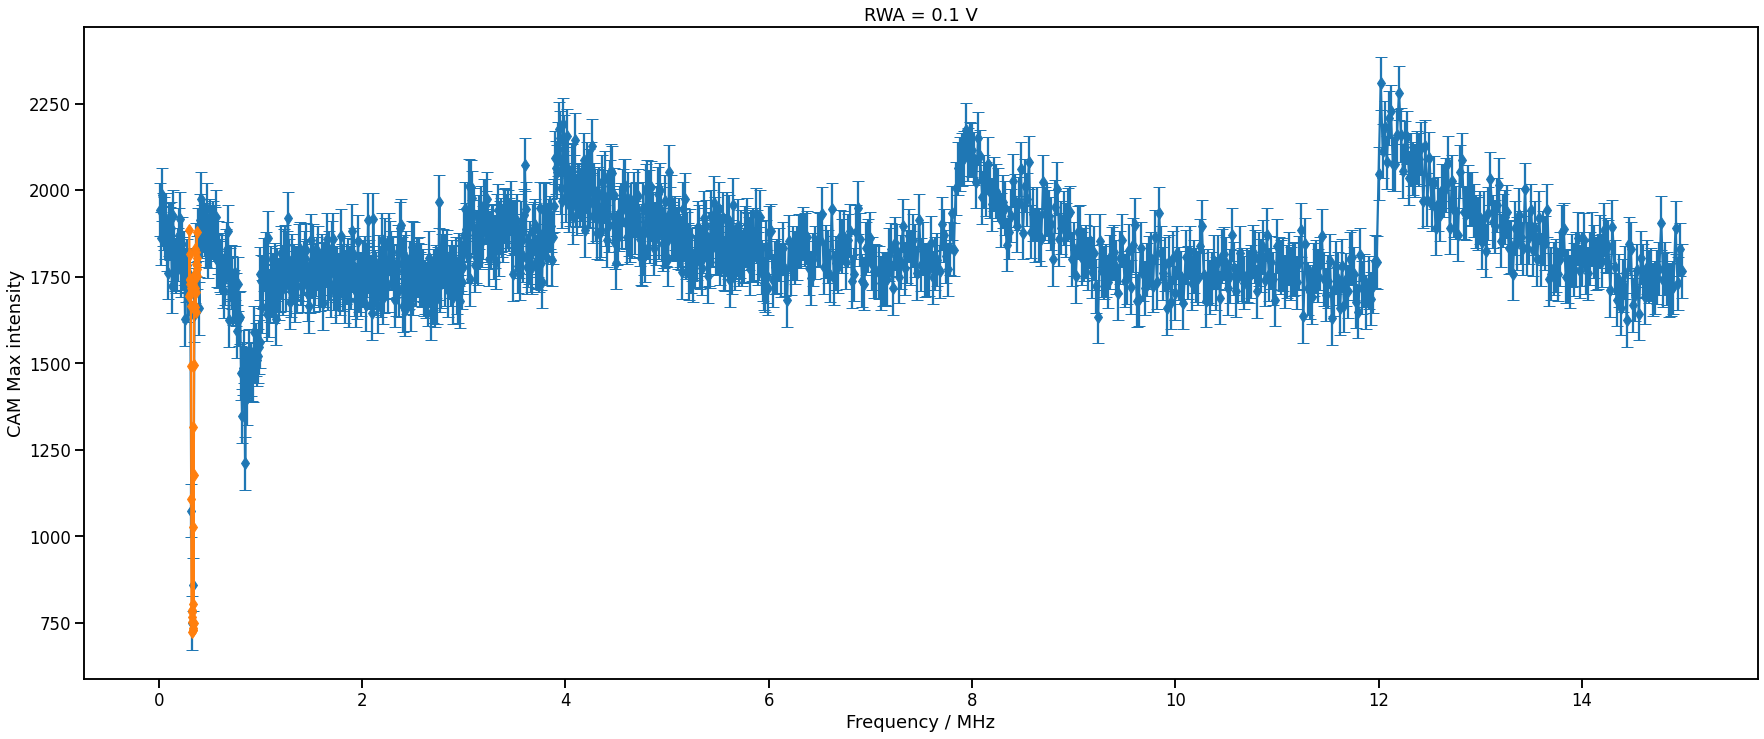

In [26]:
plt.figure(figsize=(30, 12))
plt.errorbar(frequencies * 1e-6, maxIntensities, yerr=154/2, marker='d', capsize=6) #, ls='None')    
plt.plot(frequencies__ * 1e-6, maxIntensities__, marker='d', zorder=10)   
plt.xlabel(r'Frequency / MHz')
plt.ylabel(r'CAM Max intensity')
plt.title(r'RWA = 0.1 V')


Text(0, 0.5, 'CAM Max intensity')

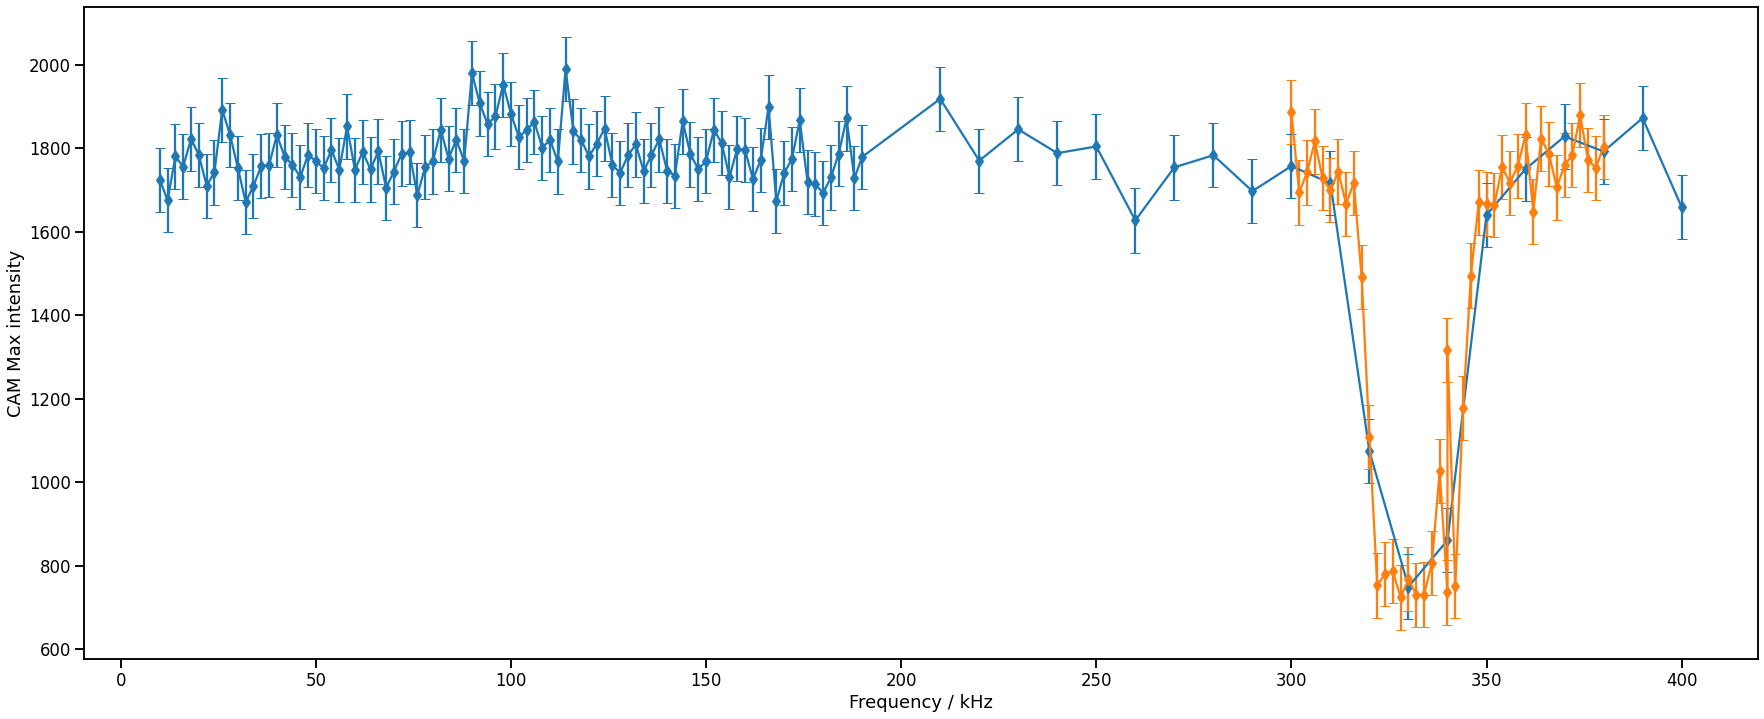

In [27]:
plt.figure(figsize=(30, 12))
plt.errorbar(frequencies_ * 1e-3, maxIntensities_, yerr=154/2, capsize=5, marker='d')   
plt.errorbar(frequencies__ * 1e-3, maxIntensities__, yerr=154/2 , capsize=5, marker='d')    
plt.xlabel(r'Frequency / kHz')
plt.ylabel(r'CAM Max intensity')

154.0
33.080000000000005
39.25230354174558


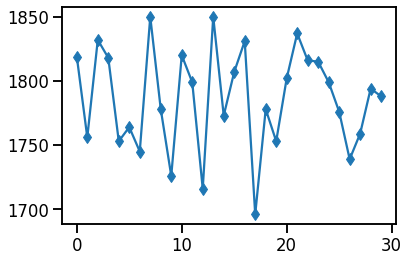

In [28]:
#shot-to-shot variability
TIMESTAMP = 142636
intenistyVariation =  extractIntensitiesFromDataSet(25, TIMESTAMP , 30)
plt.plot(intenistyVariation, marker='d')
print(np.max(intenistyVariation) - np.min(intenistyVariation))
print(np.average(np.absolute(intenistyVariation - np.average(intenistyVariation) * np.ones_like(intenistyVariation))))
print(np.std(intenistyVariation))

In [29]:
frequencies1 = np.array([])
maxIntensities1 = np.array([])
frequencies2 = np.array([])
maxIntensities2 = np.array([])
frequencies3 = np.array([])
maxIntensities3 = np.array([])
frequencies4 = np.array([])
maxIntensities4 = np.array([])

frequencies_test = np.array([])
maxIntensities_test = np.array([])

In [30]:
TIMESTAMP = '085331'
maxIntensities1 = np.concatenate((maxIntensities1, extractIntensitiesFromDataSet(26, TIMESTAMP , 201)))
frequencies1 = np.concatenate((frequencies1, np.arange(3.5e6, 4.5e6 + 0.0025e6, 0.005e6)))


In [31]:
#lower RWA
TIMESTAMP = '095940'
maxIntensities4 = np.concatenate((maxIntensities4, extractIntensitiesFromDataSet(26, TIMESTAMP , 201)))
frequencies4 = np.concatenate((frequencies4, np.arange(3.5e6, 4.5e6 + 0.0025e6, 0.005e6)))


In [32]:
TIMESTAMP = '090345'
maxIntensities2 = np.concatenate((maxIntensities2, extractIntensitiesFromDataSet(26, TIMESTAMP , 301)))
frequencies2 = np.concatenate((frequencies2, np.arange(7.8e6, 9.3e6 + 0.0025e6, 0.005e6)))


In [33]:
TIMESTAMP = '092350'
maxIntensities3 = np.concatenate((maxIntensities3, extractIntensitiesFromDataSet(26, TIMESTAMP , 301)))
frequencies3 = np.concatenate((frequencies3, np.arange(12e6, 13.5e6 + 0.0025e6, 0.005e6)))

In [34]:
# TIMESTAMP = 090345
# maxIntensities2 = np.concatenate((maxIntensities2, extractIntensitiesFromDataSet(26, TIMESTAMP , 301)))
# frequencies2 = np.concatenate((frequencies2, np.arange(7.8e6, 9.3e6, 0.005e6)))

In [35]:
TIMESTAMP = '093748'
maxIntensities_test = np.concatenate((maxIntensities_test, extractIntensitiesFromDataSet(26, TIMESTAMP , 201)))
frequencies_test = np.concatenate((frequencies_test, np.arange(3.5e6, 4.5e6 + 0.0025e6, 0.005e6)))


250.0
42.443400000000004
52.17353352035877


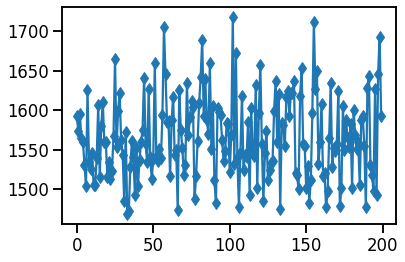

In [36]:
#shot-to-shot variability
TIMESTAMP = '093748'
intenistyVariation =  extractIntensitiesFromDataSet(26, TIMESTAMP , 200)
plt.plot(intenistyVariation, marker='d')
print(np.max(intenistyVariation) - np.min(intenistyVariation))
print(np.average(np.absolute(intenistyVariation - np.average(intenistyVariation) * np.ones_like(intenistyVariation))))
print(np.std(intenistyVariation))
yERR = 52

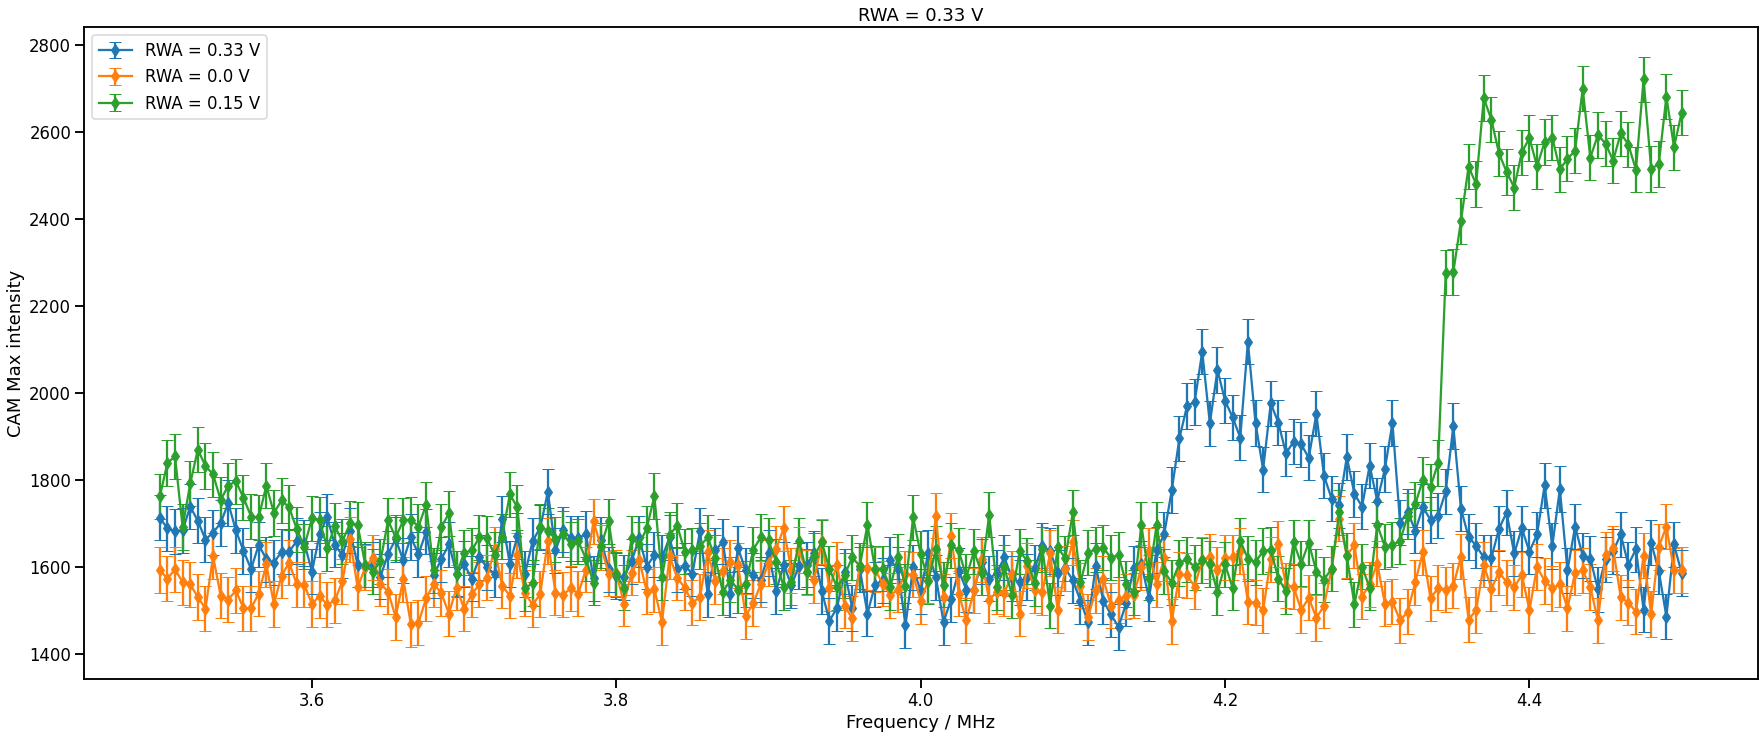

In [37]:
plt.figure(figsize=(30, 12))
plt.errorbar(frequencies1 * 1e-6, maxIntensities1, yerr=yERR, marker='d', capsize=6, label=r'RWA = 0.33 V') #, ls='None')  
plt.errorbar(frequencies_test * 1e-6, maxIntensities_test, yerr=yERR, marker='d', capsize=6, label=r'RWA = 0.0 V') #, ls='None')   
plt.errorbar(frequencies4 * 1e-6, maxIntensities4, yerr=yERR, marker='d', capsize=6, label=r'RWA = 0.15 V') #, ls='None')    
plt.xlabel(r'Frequency / MHz')
plt.ylabel(r'CAM Max intensity')
plt.title(r'RWA = 0.33 V')
plt.legend()

In [42]:
frequencies1_new = np.array([])
maxIntensities1_new = np.array([])
frequencies2_new = np.array([])
maxIntensities2_new = np.array([])
frequencies3_new = np.array([])
maxIntensities3_new = np.array([])
frequencies4_new = np.array([])
maxIntensities4_new = np.array([])

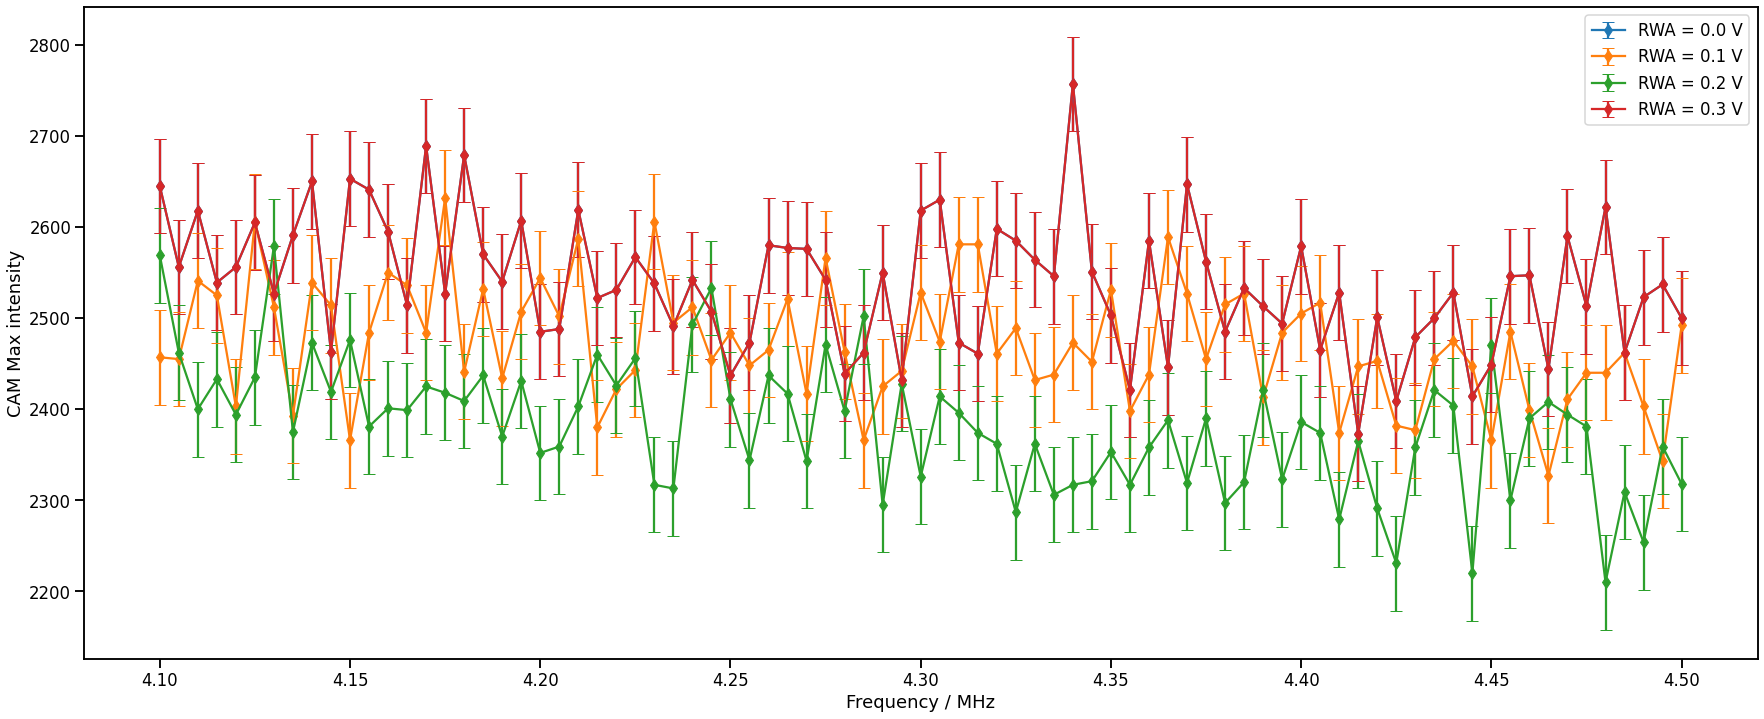

In [43]:
TIMESTAMP = '102242'
maxIntensities1_new = np.concatenate((maxIntensities1_new, extractIntensitiesFromDataSet(26, TIMESTAMP , 81)))
frequencies1_new = np.concatenate((frequencies1_new, np.arange(4.1e6, 4.5e6 + 0.0025e6, 0.005e6)))
TIMESTAMP = '102648'
maxIntensities2_new = np.concatenate((maxIntensities2_new, extractIntensitiesFromDataSet(26, TIMESTAMP , 81)))
frequencies2_new = np.concatenate((frequencies2_new, np.arange(4.1e6, 4.5e6 + 0.0025e6, 0.005e6)))
TIMESTAMP = '103124'
maxIntensities3_new = np.concatenate((maxIntensities3_new, extractIntensitiesFromDataSet(26, TIMESTAMP , 81)))
frequencies3_new = np.concatenate((frequencies3_new, np.arange(4.1e6, 4.5e6 + 0.0025e6, 0.005e6)))
TIMESTAMP = '103518'
maxIntensities4_new = np.concatenate((maxIntensities4_new, extractIntensitiesFromDataSet(26, TIMESTAMP , 81)))
frequencies4_new = np.concatenate((frequencies4_new, np.arange(4.1e6, 4.5e6 + 0.0025e6, 0.005e6)))

plt.figure(figsize=(30, 12))
plt.errorbar(frequencies1_new * 1e-6, maxIntensities1_new, yerr=yERR, marker='d', capsize=6, label=r'RWA = 0.0 V') #, ls='None')  
plt.errorbar(frequencies2_new * 1e-6, maxIntensities2_new, yerr=yERR, marker='d', capsize=6, label=r'RWA = 0.1 V') #, ls='None')  
plt.errorbar(frequencies3_new * 1e-6, maxIntensities3_new, yerr=yERR, marker='d', capsize=6, label=r'RWA = 0.2 V') #, ls='None')  
plt.errorbar(frequencies4_new * 1e-6, maxIntensities4_new, yerr=yERR, marker='d', capsize=6, label=r'RWA = 0.3 V') #, ls='None')  
plt.xlabel(r'Frequency / MHz')
plt.ylabel(r'CAM Max intensity')
#plt.title(r'RWA = 0.33 V')
plt.legend()

Text(0.5, 1.0, 'RWA = 0.33 V')

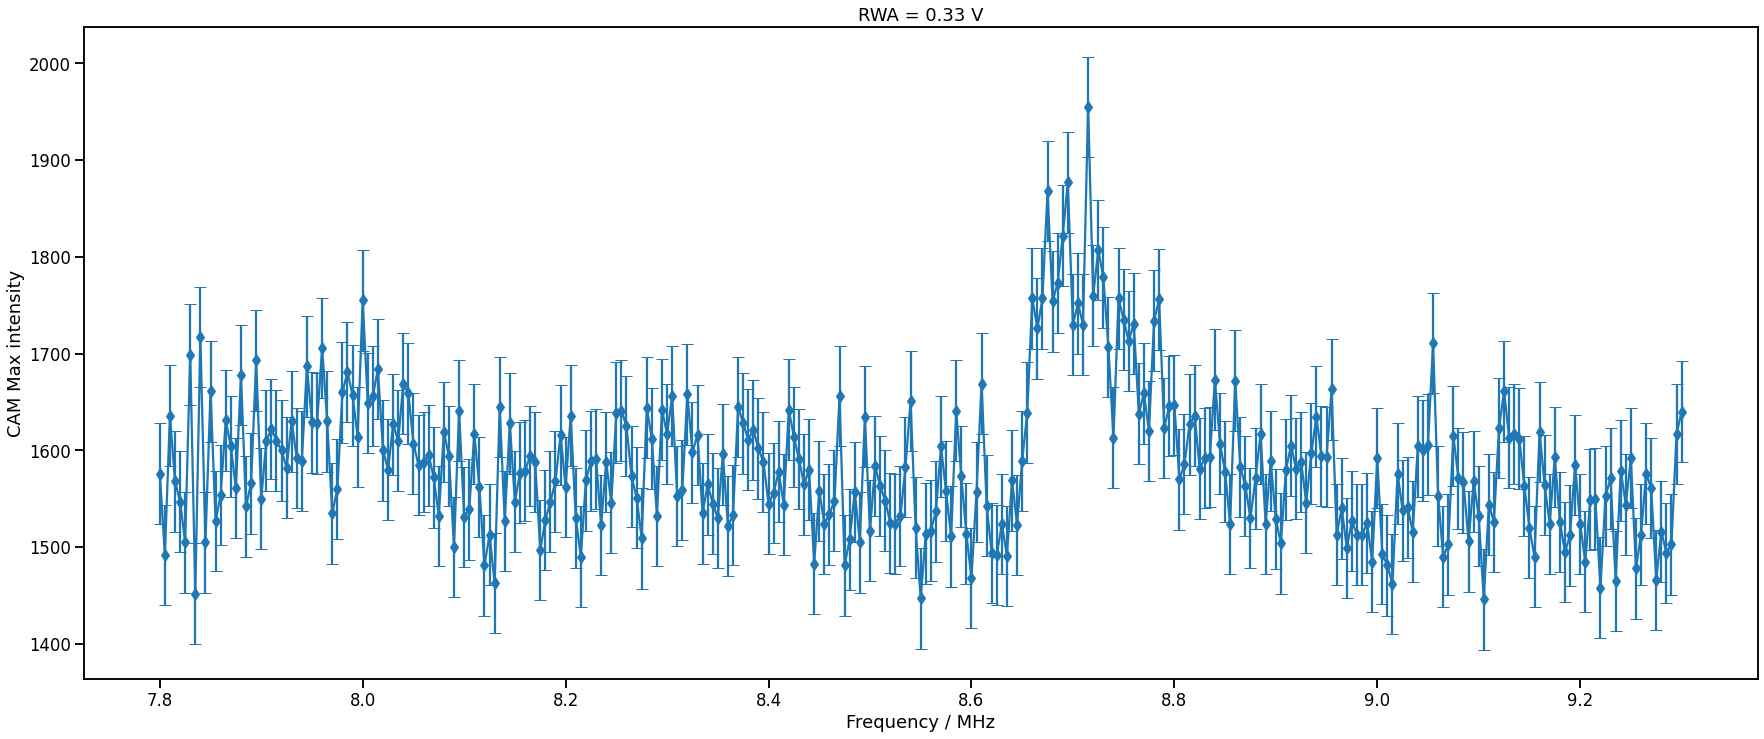

In [40]:
plt.figure(figsize=(30, 12))
plt.errorbar(frequencies2 * 1e-6, maxIntensities2, yerr=yERR, marker='d', capsize=6) #, ls='None')    
plt.xlabel(r'Frequency / MHz')
plt.ylabel(r'CAM Max intensity')
plt.title(r'RWA = 0.33 V')

Text(0.5, 1.0, 'RWA = 0.33 V')

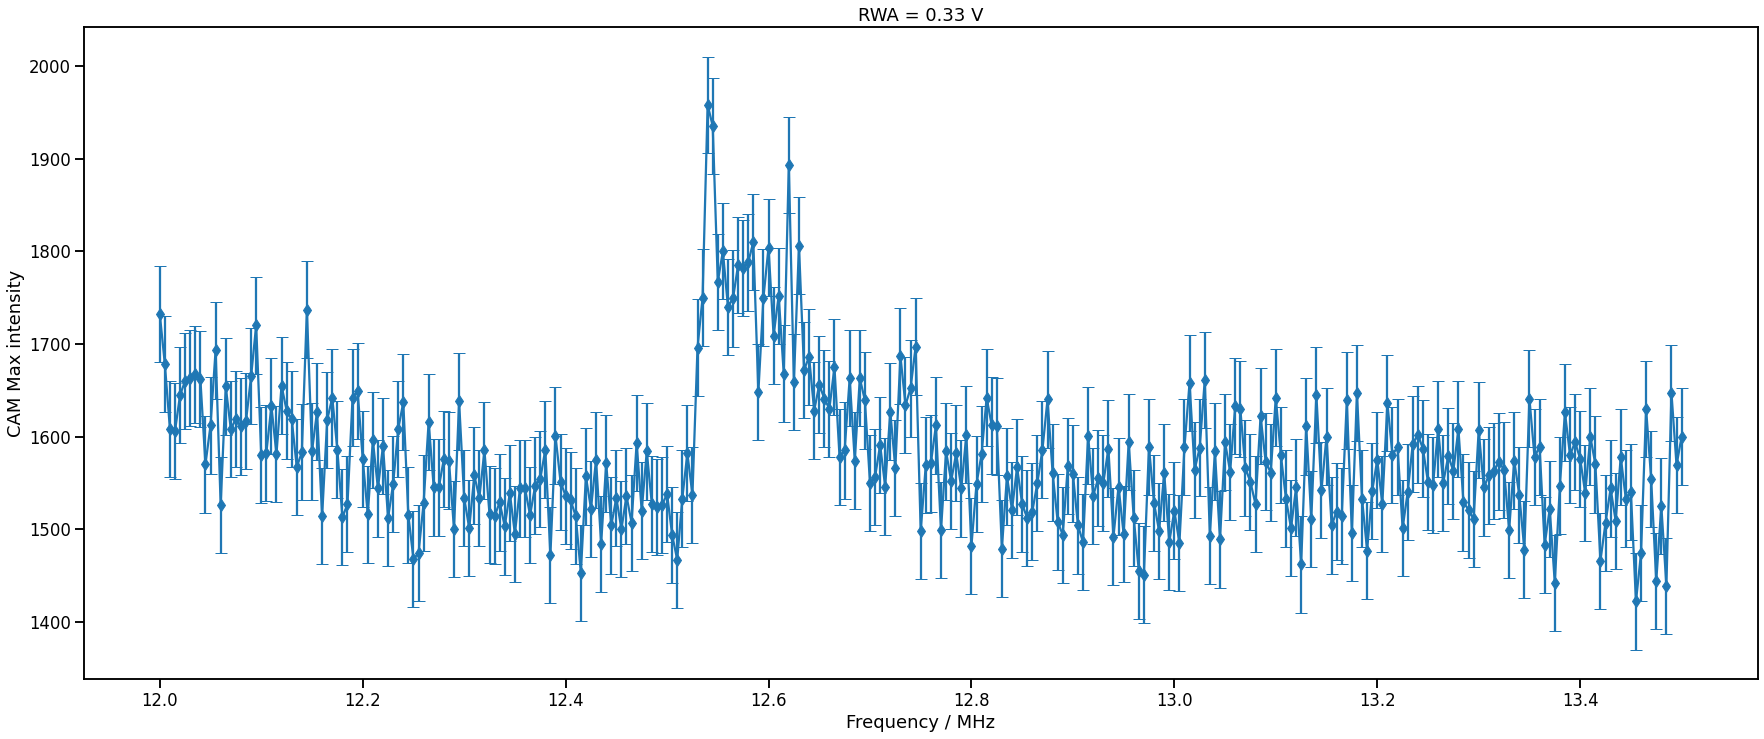

In [41]:
plt.figure(figsize=(30, 12))
plt.errorbar(frequencies3 * 1e-6, maxIntensities3, yerr=yERR, marker='d', capsize=6) #, ls='None')    
plt.xlabel(r'Frequency / MHz')
plt.ylabel(r'CAM Max intensity')
plt.title(r'RWA = 0.33 V')